In [1]:
 import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

(train_img, train_labl),(test_img, test_labl)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
train_img,test_img = train_img/255.0,test_img/255.0
train_labl = tf.keras.utils.to_categorical(train_labl,10)
test_labl = tf.keras.utils.to_categorical(test_labl,10)

In [3]:
names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [4]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
hstr=model.fit(train_img,train_labl,epochs=10,validation_data=(test_img,test_labl))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3703 - loss: 1.6945 - val_accuracy: 0.5765 - val_loss: 1.1754
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6102 - loss: 1.1085 - val_accuracy: 0.6385 - val_loss: 1.0245
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.6768 - loss: 0.9237 - val_accuracy: 0.6690 - val_loss: 0.9444
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7249 - loss: 0.7843 - val_accuracy: 0.7013 - val_loss: 0.8520
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7597 - loss: 0.6907 - val_accuracy: 0.7104 - val_loss: 0.8382
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7889 - loss: 0.6036 - val_accuracy: 0.7108 - val_loss: 0.8546
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8168 - loss: 0.5248 - val_accuracy: 0.7029 - val_loss: 0.9131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8343 -

In [7]:
test_loss, test_acc = model.evaluate(test_img,test_labl,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.7043 - loss: 1.0970

Test accuracy: 0.7042999863624573


In [8]:
acc =hstr.history['accuracy']
val_acc =hstr.history['val_accuracy']
loss =hstr.history['loss']
val_loss =hstr.history['val_loss']

In [9]:
epochs = range(1,len(acc)+1)

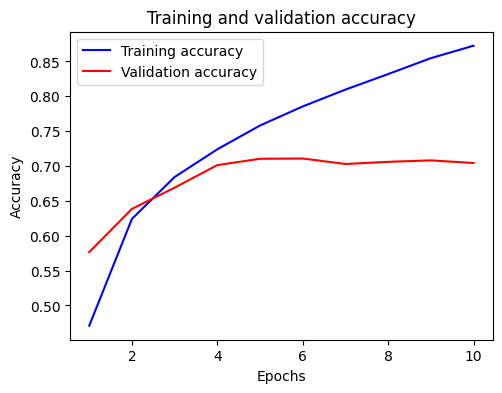

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

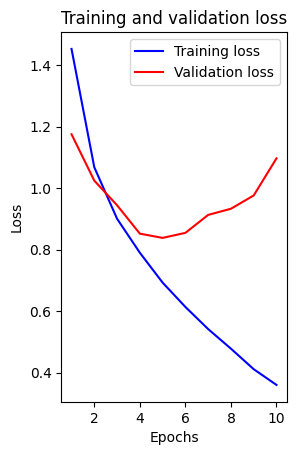

In [11]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [12]:
import numpy as np

In [13]:
img_index = 0 
img = test_img[img_index]
true_labl = names[np.argmax(test_labl[img_index])]

In [14]:
img = np.expand_dims(img, axis=0)

In [15]:
predictions = model.predict(img)
predicted_labl = names[np.argmax(predictions[0])]
print(f"True Label: {true_labl}")
print(f"Predicted Label: {predicted_labl}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
True Label: cat
Predicted Label: cat
